# Vector Embedding

## Vectors

A vector is a mathematical object that has both magnitude and direction. It is often represented as an arrow in a coordinate system, where the length of the arrow represents the magnitude and the direction of the arrow represents the direction.

$$
\vec{v} = \begin{pmatrix} 3 \\ 4 \end{pmatrix}
$$

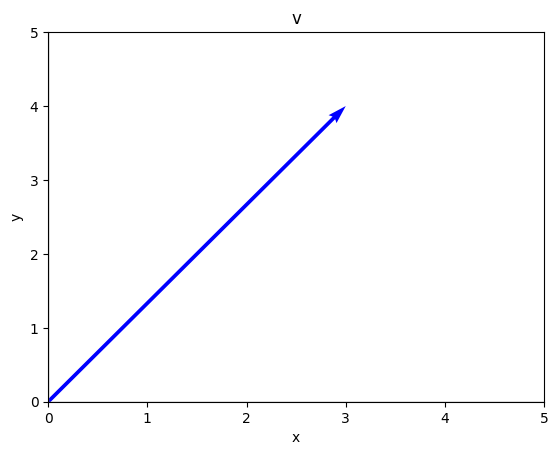

In [1]:
from my_functions import draw_vectors

draw_vectors([[3, 4, "b"]], [0, 5], [0, 5], "v")

### Vector Norm (Magnitude|Length)

The norm of a vector is a measure of the length of the vector. It is calculated as the square root of the sum of the squares of the vector elements.

$$
\| \vec{v} \| = \sqrt{3^2 + 4^2}=5

### Vector Normalization

Normalization is the process of scaling individual samples to have unit norm. In case of vectors, it is the process of scaling a vector to have a length of 1.

$$
\vec{v_0} = \frac{\vec{v}}{\| \vec{v} \|} = \frac{\begin{pmatrix} 3 \\ 4 \end{pmatrix}}{5} = \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix}
$$

$$
\| \vec{v_0} \| = \sqrt{0.6^2 + 0.8^2} = 1
$$

The direction of the vector keeps the same after normalization.

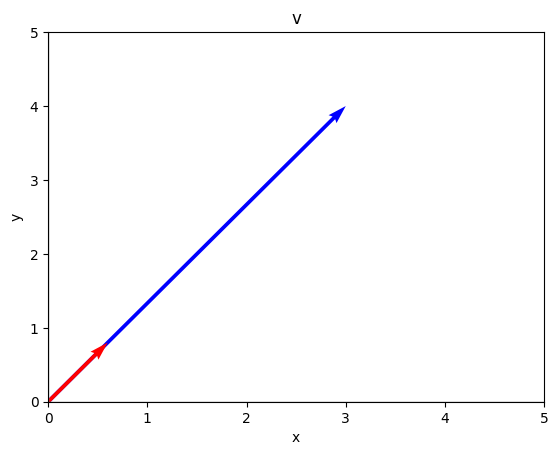

In [2]:
draw_vectors([[3, 4, "b"], [0.6, 0.8, "r"]], [0, 5], [0, 5], "v")

### Vector Multiplication (Dot Product)

The dot product of two vectors is a scalar quantity that is calculated as the sum of the products of the corresponding elements of the two vectors. It is also called the inner product. The dot product has a result of zero if the two vectors are orthogonal (perpendicular) to each other.

$$
\vec{v} \cdot \vec{w} = \begin{pmatrix} 3 \\ 4 \end{pmatrix} \cdot \begin{pmatrix} -4 \\ 3 \end{pmatrix} = 3 \cdot (-4) + 4 \cdot 3 = 0
$$

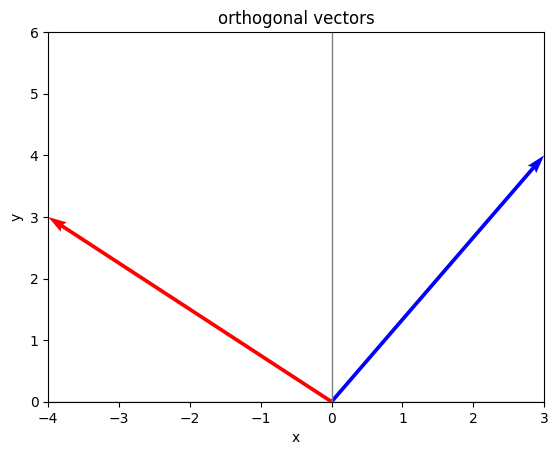

In [3]:
draw_vectors([[3, 4, "b"], [-4, 3, "r"]], [-4, 3], [0, 6], "orthogonal vectors")

### Angle Between Vectors

The angle is independent of the magnitude of the vectors and is calculated as the inverse cosine of the dot product of the vectors divided by the product of the magnitudes of the vectors.

![Angle Between Vectors](img/angle.png)

$$
\cos(\phi) = \frac{\vec{v} \cdot \vec{w}}{\| \vec{v} \| \cdot \| \vec{w} \|} = \text{cosine similarity}
$$

So if the magnitudes of the vectors are 1, the cosine similarity is the same as the dot product because the division by 1 does not change the value!

$$
\cos(\phi) = \vec{v_0} \cdot \vec{w_0} = \text{cosine similarity}
$$

#### Cosine Similarity

The cosine similarity has a range of [-1,1].

| Cosine Similarity | Angle |
| --- | --- |
| 1 | 0° |
| 0 | 90° |
| -1 | 180° |



## Embeddings

An embedding model takes data like texts, images, or audio and converts it into a vector space. The vector space is a multi-dimensional space where each dimension represents a feature of the data. The embedding model learns to map the data into the vector space in such a way that similar data points are close to each other in the vector space.

![Embedding](img/embedding.png)

Source: https://jkfran.com/introduction-vector-embedding-databases.md

Embeddings are used in many machine learning tasks, such as natural language processing, computer vision, and recommendation systems. Now it's easier to find similar items, compare items, and make predictions based on the data.

In [4]:
import numpy as np
from openai import OpenAI
import pandas as pd

In [5]:
# Import OpenAI key

with open("key", "r") as f:
    key = f.read().strip()

In [6]:
# Create OpenAI client
client = OpenAI(
    api_key=key,
)

In [7]:
# Define a helper function to calculate embeddings
def get_embedding_vec(input):
    """Returns the embeddings vector for a given input"""
    return (
        client.embeddings.create(
            input=input,
            model="text-embedding-3-large",  # We use the new embeddings model here (announced end of Jan 2024)
            dimensions=500,  # You can limit the number of output dimensions with the new embeddings models
        )
        .data[0]
        .embedding
    )

In [8]:
places = []
with open("places.txt", "r") as f:
    lines = f.read().split("\n")
    for line in lines:
        parts = line.split(": ")
        places.append(
            {
                "Name": parts[0],
                "Description": parts[1],
                "Embedding": get_embedding_vec(parts[1]),
            }
        )

In [9]:
search = "Ich möchte einen Badeurlaub am Strand machen."
search_embedding = get_embedding_vec(search)

In [10]:
data = {"Name": [], "Similarity": []}
for place in places:
    similarity = np.dot(search_embedding, place["Embedding"])
    data["Name"].append(place["Name"])
    data["Similarity"].append(similarity)
pd.DataFrame(data).sort_values("Similarity", ascending=False)

,Name,Similarity
2,"Costa del Sol, Spanien",0.535521
4,"Santorini, Griechenland",0.383145
5,"Amazonas, Brasilien",0.371182
6,"Great Barrier Reef, Australien",0.360919
8,"Kyoto, Japan",0.353545
9,"Yellowstone Nationalpark, USA",0.341874
3,"Chamonix, Frankreich",0.325250
0,"Berlin, Deutschland",0.283382
7,"Serengeti, Tansania",0.282234
1,"München, Deutschland",0.281933
